In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy

In [2]:
from astropy.timeseries import LombScargle
from gatspy.periodic import LombScargleFast
from gatspy.periodic import LombScargle
from matplotlib.backends.backend_pdf import PdfFile, PdfPages

In [3]:
from statistics import mean
from turtle import filling
num=list()
def read(path,c):
    df = pd.read_csv(path)
    global pdfFile
    if c <10:
        pdfFile = PdfPages(f"data/power_spectrum/00{c}(PSD).pdf")
    else: 
        pdfFile = PdfPages(f"data/power_spectrum/0{c}(PSD).pdf")
    global wu_pulmer_score
    wu_pulmer_score = list(df["Wu-Pulmer"])
    global SBERT
    SBERT = list(df["SBERT"])
    global Wu_Pulmer_Divided 
    Wu_Pulmer_Divided = list(df["Wu-Pulmer_divided"])
    global pair_counts
    pair_counts = list(df["pair_counts"])
    q=0
    global num
    num=[]
    while q <len(df):
        num += [q]
        q+=1


In [4]:
import numpy as np
from astropy.timeseries import LombScargle
import matplotlib.transforms as transforms

In [5]:
def calculate_PSD(x):

    frequency, power = LombScargle(num,wu_pulmer_score).autopower(minimum_frequency=0.01,maximum_frequency=0.1)
    #fig = plt.figure(figsize = (20,6))
    fig, ax=plt.subplots(figsize = (20,6))
    plt.title(f"subject:{x}     raw_wu_pulmer_score_PSD ")
    plt.grid()
    plt.xlabel("frequency")
    plt.show
    ax.plot(frequency, power)   
    pmax_f = frequency[numpy.where(power == max(power))]
    ax.axhline(y=max(power), linestyle = "dashed", xmin=0.01, xmax=20,color = "red")
    ax.axvline(x = pmax_f, linestyle = "dashed", ymin=0, ymax = 25 ,color = "red")
    
    trans = transforms.blended_transform_factory( ax.get_yticklabels()[0].get_transform(), ax.transData)
    plt.text(0,23, "{:.0f}".format(max(power)), color="red", transform=trans, ha="right", va="center")
   
    pdfFile.savefig(fig)



    frequency, power = LombScargle(num,SBERT).autopower(minimum_frequency=0.01,maximum_frequency=0.1)
    fig = plt.figure(figsize = (20,6))
    plt.title(f"subject:{x}     SBERT_PSD ")
    plt.grid()
    plt.show
    plt.xlabel("frequency")
    plt.plot(frequency, power)    
    pmax_f = frequency[numpy.where(power == max(power))]
    plt.axhline(y=max(power), linestyle = "dashed", xmin=0.01, xmax=20,color = "red")
    plt.axvline(x = pmax_f, linestyle = "dashed", ymin=0, ymax = 25 ,color = "red")  
    pdfFile.savefig(fig)

    frequency, power = LombScargle(num,Wu_Pulmer_Divided).autopower(minimum_frequency=0.01,maximum_frequency=0.1)
    fig = plt.figure(figsize = (20,6))
    plt.title(f"subject:{x}     wu_pulmer_divided_PSD ")
    plt.grid()
    plt.xlabel("frequency")
    plt.show
    plt.plot(frequency, power)    
    pmax_f = frequency[numpy.where(power == max(power))]
    plt.axhline(y=max(power), linestyle = "dashed", xmin=0.01, xmax=20,color = "red")
    plt.axvline(x = pmax_f, linestyle = "dashed", ymin=0, ymax = 25 ,color = "red")   
    pdfFile.savefig(fig)
 
        



In [6]:
'''
read(f"data/Text/019(results).csv",19)
good = pd.read_csv("data/Text/019(done).csv")
print(good.describe())
calculate_PSD(19)
pdfFile.close()
'''

'\nread(f"data/Text/019(results).csv",19)\ngood = pd.read_csv("data/Text/019(done).csv")\nprint(good.describe())\ncalculate_PSD(19)\npdfFile.close()\n'

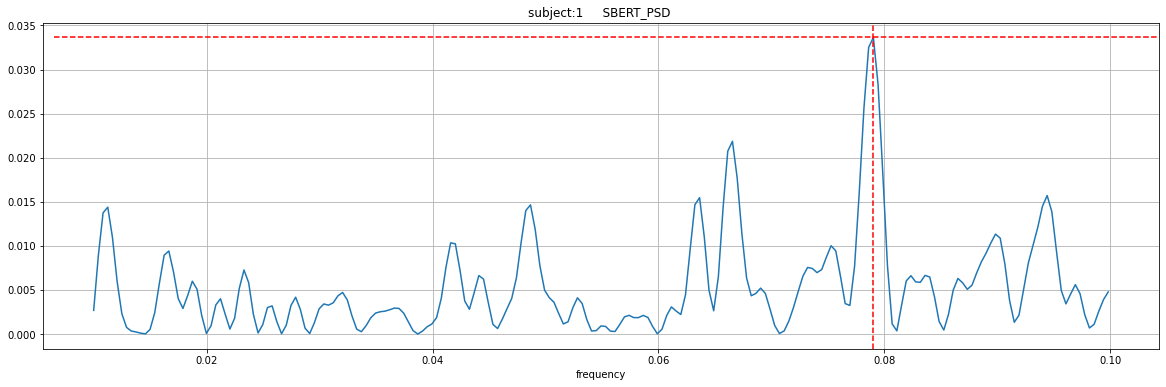

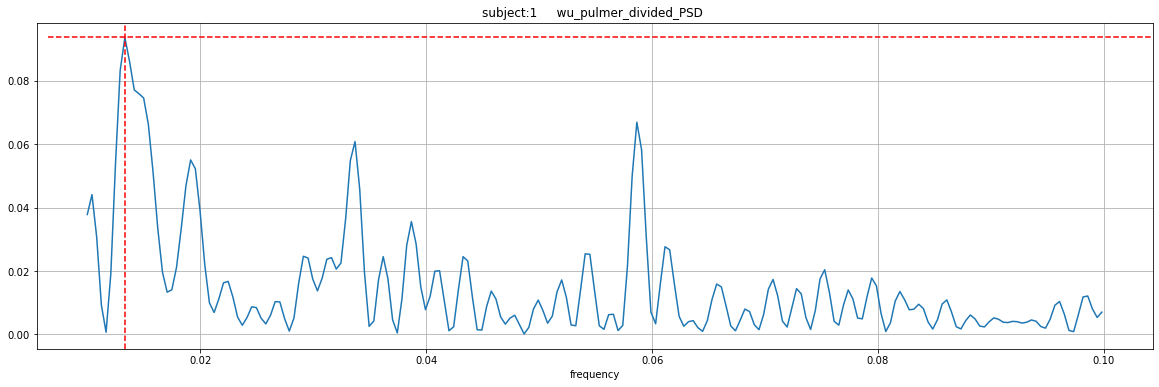

error: 0


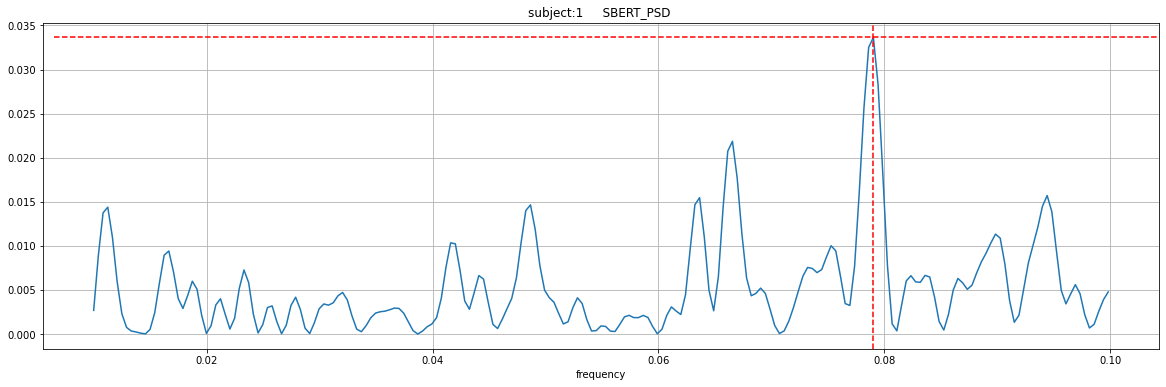

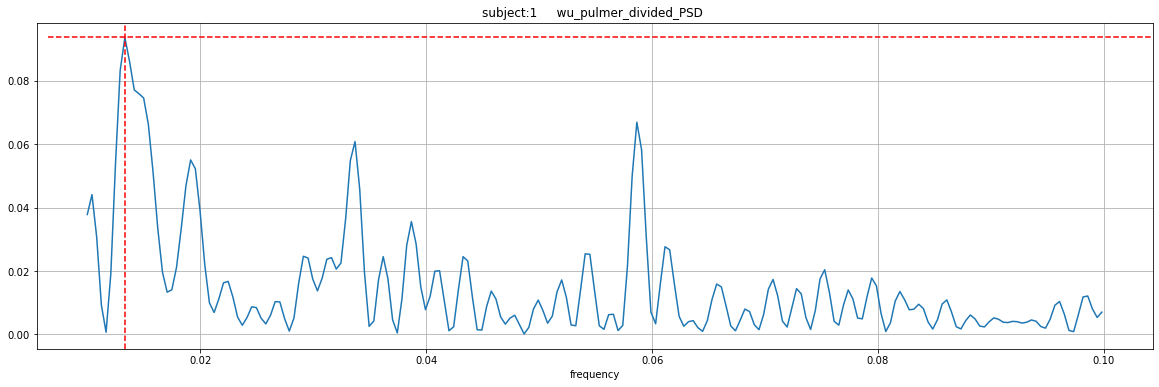

In [8]:
for x in range (0,2):
    if x < 10:
        try:
            read(f"data/Text/00{x}(results).csv",x)
            calculate_PSD(x)
            pdfFile.close()
        except:
            print("error:", x)
            continue
       
    else:
        try:
            read(f"data/Text/0{x}(results).csv",x)
            calculate_PSD(x)
            pdfFile.close()
        except:
            print("error:", x)
            continue

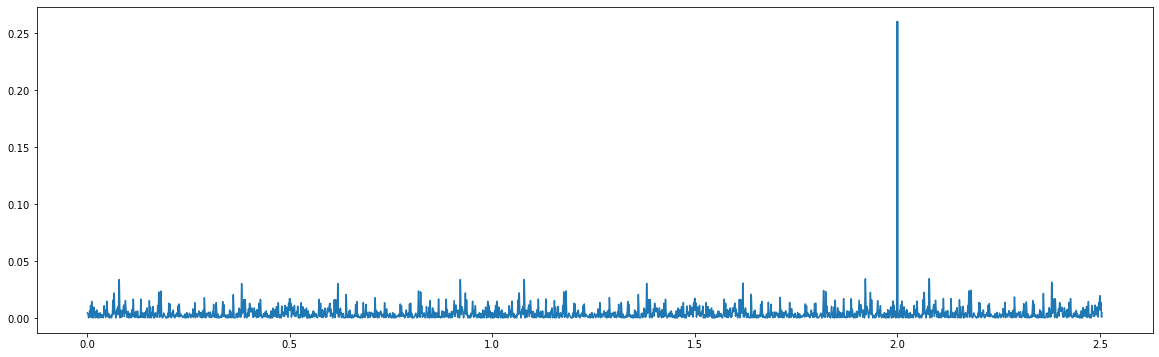

In [9]:
from astropy.timeseries import LombScargle
frequency, power = LombScargle(num,SBERT).autopower()
fig = plt.figure(figsize = (20,6))
plt.plot(frequency, power)       

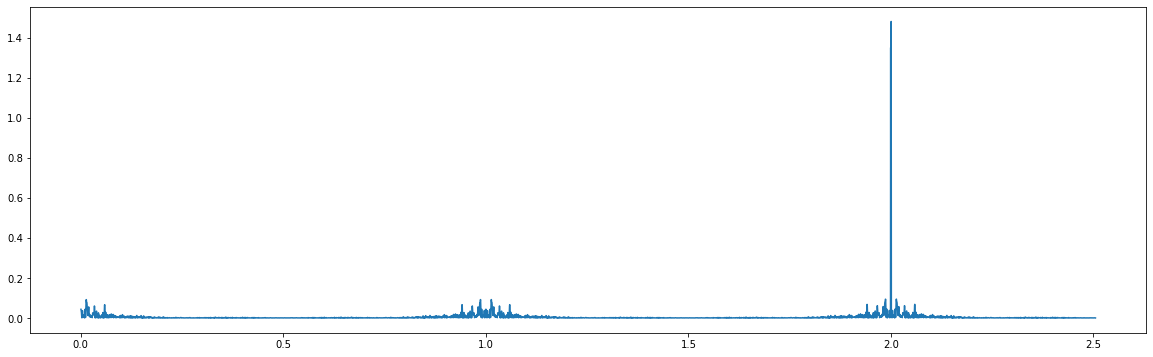

In [10]:
from astropy.timeseries import LombScargle
frequency, power = LombScargle(num,Wu_Pulmer_Divided).autopower()
fig = plt.figure(figsize = (20,6))
plt.plot(frequency, power)       